# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [276]:
%matplotlib inline

In [277]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [278]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].unique())
mouse_count

249

In [279]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [280]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [281]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [282]:
# Checking the number of mice in the clean DataFrame.
reduced_mouse_count = len(cleaned_data["Mouse ID"].unique())
reduced_mouse_count

248

## Summary Statistics

In [283]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Set "Drug Regimen" as index
tumor_data = cleaned_data.copy()

tumor_data = tumor_data.set_index(["Drug Regimen"])

# Calculate mean tumor volumne for each regimen
tumors_mean = tumor_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate median tumor volumne for each regimen
tumors_median = tumor_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance of tumor volumne for each regimen
tumors_var = tumor_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate standard deviation of tumor volumne for each regimen
tumors_std_dev = tumor_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM of tumor volumne for each regimen
tumors_sem = tumor_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Combine into summary table
summary_stats = pd.DataFrame({"Mean Tumor Volume": tumors_mean, 
                              "Median Tumor Volume": tumors_median, 
                              "Tumor Volume Variance": tumors_var, 
                              "Tumor Volume Std. Dev.": tumors_std_dev, 
                              "Tumor Volume Std. Err.": tumors_sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [284]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

## Bar and Pie Charts

In [320]:
# Create new dataframe to calculate total timepoints for each Drug Regimen
timepoint_count = cleaned_data.groupby("Drug Regimen")["Timepoint"].count()
timepoint_df = pd.DataFrame({"Number of Samples": timepoint_count}).reset_index()
timepoint_df = timepoint_df.sort_values("Number of Samples", ascending=False)
timepoint_df

,Drug Regimen,Number of Samples
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


<Axes: title={'center': 'Number of Samples per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Samples'>

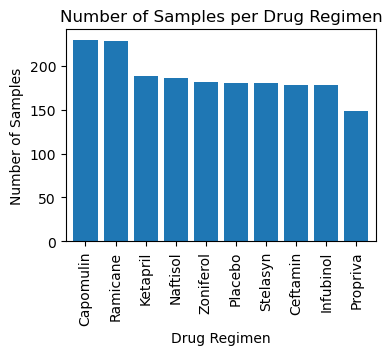

In [373]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_plot = timepoint_df.plot(kind="bar", width=0.8, figsize=(4, 2.75), align="center", legend=False)
timepoint_plot.set_xticklabels(timepoint_df["Drug Regimen"], rotation="vertical")
timepoint_plot.set_xlabel("Drug Regimen")
timepoint_plot.set_ylabel("Number of Samples")
timepoint_plot.set_title("Number of Samples per Drug Regimen")
timepoint_plot

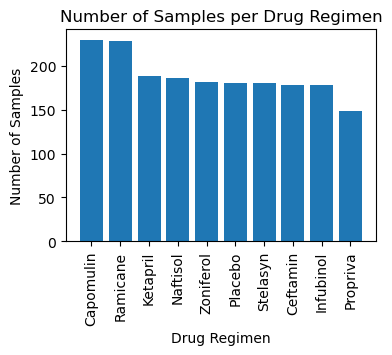

In [374]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(4, 2.75))
plt.bar(x_axis, timepoint_df["Number of Samples"], align="center")
plt.xticks(tick_locations, timepoint_df["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Drug Regimen")
plt.show()

In [323]:
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


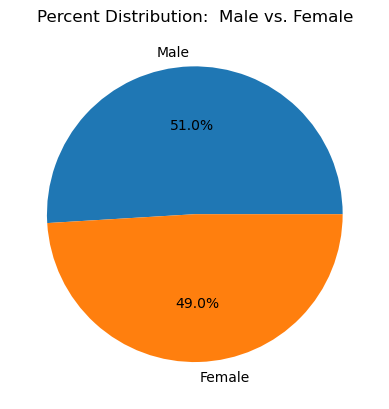

In [391]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_counts = cleaned_data.groupby("Sex")["Mouse ID"].count()
mouse_gender_df = pd.DataFrame({"Count": mouse_gender_counts}).reset_index()
mouse_gender_df = mouse_gender_df.sort_values("Count", ascending=False)
gender_pie = mouse_gender_df.plot(kind="pie", y="Count", labels=mouse_gender_df["Sex"], legend=False, autopct="%1.1f%%")
gender_pie.set_title("Percent Distribution:  Male vs. Female")
gender_pie.set_ylabel("")
plt.show()

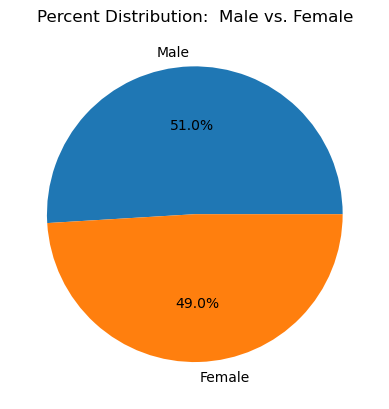

In [388]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_df["Count"], labels=(mouse_gender_df["Sex"]), autopct="%1.1f%%")
plt.title("Percent Distribution:  Male vs. Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [291]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [292]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [293]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [294]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [295]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [296]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

